In [1]:
import pandas as pd
from sfma.api import SFMAModel

import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("../front41Data.csv")
df['int'] = 1.

In [3]:
df.head()

,Unnamed: 0,firm,output,capital,labour,int
0,1,1,12.778,9.416,35.134,1.0
1,2,2,24.285,4.643,77.297,1.0
2,3,3,20.855,5.095,89.799,1.0
3,4,4,13.213,4.935,35.698,1.0
4,5,5,12.018,8.717,27.878,1.0


In [4]:
model = SFMAModel(
    df=df,
    col_output='output',
    col_se='int',
    col_input='capital',
    concave=True,
    # include_gamma=True,
    increasing=True,
    pct_trimming=0.0
)
model_trimming = SFMAModel(
    df=df,
    col_output='output',
    col_se='int',
    col_input='capital',
    concave=True,
    # include_gamma=True,
    increasing=True,
    pct_trimming=0.1
)

In [5]:
model.fit(options={'solver_options': {}})
model_trimming.fit(options={'solver_options': {}})

/opt/miniconda3/envs/sfma/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [6]:
preds = model.predict()
trimming_preds = model_trimming.predict()
df['predictions'] = preds
df['predictions_trimmed'] = trimming_preds

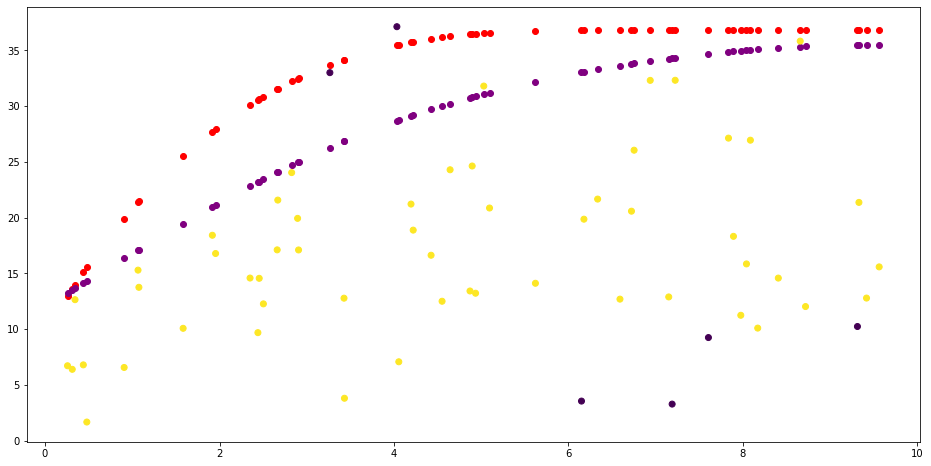

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
ax.scatter(df['capital'], df['predictions'], color='red')
ax.scatter(df['capital'], df['predictions_trimmed'], color='purple')
ax.scatter(df['capital'], df['output'], c=model_trimming.marginal_model.w)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1.])